# Brain Tumor Detection through CNN

## DA LAB Project
## Group Members:

*   M. Salman Khan
*   M. Maaz Khattak
*   Syed Muhammad Shahmeer














## Getting Dataset

Link: https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection

 60% 9.00M/15.1M [00:00<00:00, 60.7MB/s]
100% 15.1M/15.1M [00:00<00:00, 72.2MB/s]


In [4]:
! unzip /content/brain-mri-images-for-brain-tumor-detection.zip

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

## Importing Libraries and Dependencies

In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix

### EDA

In [8]:
len(os.listdir("/content/brain_tumor_dataset/"))
# 2 Classes

2

In [10]:
train_dir = "/content/brain_tumor_dataset"

## Performing Image Augmentation for better generalization plus test-valid split

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     zoom_range=0.05,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     brightness_range = [0.5, 1.4],
                                     validation_split=0.2)

train_set = train_datagen.flow_from_directory(directory=train_dir,
                                                    batch_size=10,
                                                    target_size=(224, 224),
                                                    shuffle = True,
                                                    class_mode = "binary",
                                                    subset = "training")

valid_set = train_datagen.flow_from_directory(directory=train_dir,
                                                            batch_size=10,
                                                            target_size=(224, 224),
                                                            shuffle = False,
                                                            class_mode = "binary",
                                                            subset = "validation")

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


## Plotting Augmented Images

In [23]:
x, label = train_set.next()
def plot_images(x, label):
  for im, l in zip(x, label):
    plt.figure(figsize=(3, 3))
    plt.xlabel(l)
    plt.imshow(im)
    plt.show()

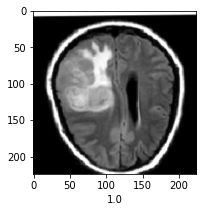

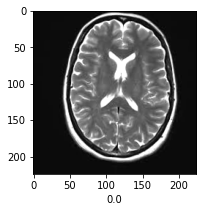

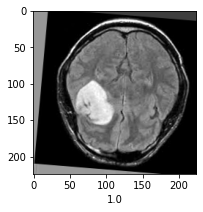

In [25]:
plot_images(x[:3], label[:3])
# 1.0 label for 'yes' and 0.0 for 'no'

## Creating Simple CNN Model

In [26]:
model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3), activation="relu", input_shape=(224,224,3)),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3)),
      tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3)),
      tf.keras.layers.Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units = 512 , activation="relu"),
      tf.keras.layers.Dropout(rate = 0.5),
      tf.keras.layers.Dense(units = 1 , activation="sigmoid")
  ])

In [30]:
metrics = [
    tf.keras.metrics.TruePositives(name='tp'),tf.keras.metrics.FalsePositives(name='fp'), # predict postive(1) for negative(0)
    tf.keras.metrics.TrueNegatives(name='tn'),tf.keras.metrics.FalseNegatives(name='fn'), # predict negative(0) for postive(1)
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),
]

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.0001),
                loss = "binary_crossentropy",
                metrics=metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

## Training

In [31]:
history1 = model.fit(train_set, epochs = 20, validation_data = valid_set)

Epoch 1/20
21/21 [==============================] - 18s 729ms/step - loss: 0.6606 - tp: 122.0000 - fp: 77.0000 - tn: 2.0000 - fn: 2.0000 - accuracy: 0.6108 - precision: 0.6131 - val_loss: 0.6262 - val_tp: 31.0000 - val_fp: 18.0000 - val_tn: 1.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.6400 - val_precision: 0.6327
Epoch 2/20
21/21 [==============================] - 15s 689ms/step - loss: 0.6291 - tp: 123.0000 - fp: 56.0000 - tn: 23.0000 - fn: 1.0000 - accuracy: 0.7192 - precision: 0.6872 - val_loss: 0.5724 - val_tp: 30.0000 - val_fp: 15.0000 - val_tn: 4.0000 - val_fn: 1.0000 - val_accuracy: 0.6800 - val_precision: 0.6667
Epoch 3/20
21/21 [==============================] - 15s 688ms/step - loss: 0.5852 - tp: 115.0000 - fp: 47.0000 - tn: 32.0000 - fn: 9.0000 - accuracy: 0.7241 - precision: 0.7099 - val_loss: 0.5176 - val_tp: 29.0000 - val_fp: 10.0000 - val_tn: 9.0000 - val_fn: 2.0000 - val_accuracy: 0.7600 - val_precision: 0.7436
Epoch 4/20
21/21 [==============================] - 15s 69

In [33]:
validation_results = model.evaluate(valid_set, verbose=0)

for name, value in zip(model.metrics_names, validation_results):
  print(name, ': ', value)

loss :  0.5671152472496033
tp :  27.0
fp :  9.0
tn :  10.0
fn :  4.0
accuracy :  0.7400000095367432
precision :  0.75


Non-tumor detected (True Negatives):  11
Non-tumor incorrectly detected (False Positives):  8
Tumor missed (False Negatives):  3
Tumor detected (True Positives):  28
Total case:  31


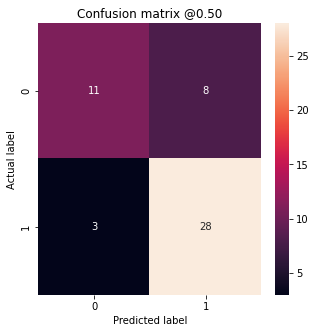

In [38]:
validation_predictions = model.predict(valid_set)

labels = valid_set.labels

cm = confusion_matrix(labels, validation_predictions > 0.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix @{:.2f}'.format(0.5))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Non-tumor detected (True Negatives): ', cm[0][0])
print('Non-tumor incorrectly detected (False Positives): ', cm[0][1])
print('Tumor missed (False Negatives): ', cm[1][0])
print('Tumor detected (True Positives): ', cm[1][1])
print('Total case: ', np.sum(cm[1]))

## Results

In [45]:
h = history1.history
h.keys()

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision'])

<function matplotlib.pyplot.show>

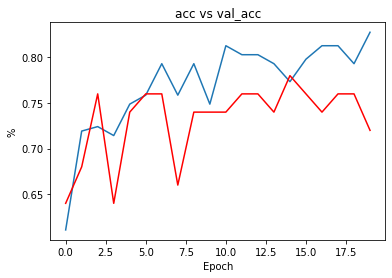

In [48]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.xlabel('Epoch')
plt.ylabel('%')
plt.title('acc vs val_acc')
plt.show

<function matplotlib.pyplot.show>

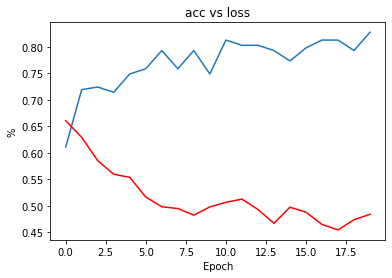

In [49]:
plt.plot(h['accuracy'])
plt.plot(h['loss'], c='red')
plt.xlabel('Epoch')
plt.ylabel('%')
plt.title('acc vs loss')
plt.show

## Transfer Learning using MobileNet V2

In [50]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
                              base_model,
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(1024, activation = 'relu'),
                              tf.keras.layers.Dropout(rate = 0.2),
                              tf.keras.layers.Dense(1, activation='sigmoid')
                            ])

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.00008),
                loss = "binary_crossentropy",
                metrics=metrics)

model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1024)              1311744   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                         

In [51]:
history2 = model.fit(train_set, epochs = 20, validation_data = valid_set)

Epoch 1/20
21/21 [==============================] - 14s 513ms/step - loss: 0.6551 - tp: 134.0000 - fp: 62.0000 - tn: 36.0000 - fn: 21.0000 - accuracy: 0.6719 - precision: 0.6837 - val_loss: 0.4125 - val_tp: 26.0000 - val_fp: 2.0000 - val_tn: 17.0000 - val_fn: 5.0000 - val_accuracy: 0.8600 - val_precision: 0.9286
Epoch 2/20
21/21 [==============================] - 9s 463ms/step - loss: 0.4440 - tp: 114.0000 - fp: 24.0000 - tn: 55.0000 - fn: 10.0000 - accuracy: 0.8325 - precision: 0.8261 - val_loss: 0.3361 - val_tp: 26.0000 - val_fp: 1.0000 - val_tn: 18.0000 - val_fn: 5.0000 - val_accuracy: 0.8800 - val_precision: 0.9630
Epoch 3/20
21/21 [==============================] - 9s 441ms/step - loss: 0.3521 - tp: 108.0000 - fp: 13.0000 - tn: 66.0000 - fn: 16.0000 - accuracy: 0.8571 - precision: 0.8926 - val_loss: 0.2644 - val_tp: 30.0000 - val_fp: 2.0000 - val_tn: 17.0000 - val_fn: 1.0000 - val_accuracy: 0.9400 - val_precision: 0.9375
Epoch 4/20
21/21 [==============================] - 9s 441ms

In [54]:
model.save('/content/brain_tumor_detection_model.h5')

In [55]:
! cp /content/brain_tumor_detection_model.h5 /content/drive/MyDrive/

In [52]:
validation_results = model.evaluate(valid_set, verbose=0)

for name, value in zip(model.metrics_names, validation_results):
  print(name, ': ', value)

loss :  0.15041548013687134
tp :  30.0
fp :  0.0
tn :  19.0
fn :  1.0
accuracy :  0.9800000190734863
precision :  1.0


Non-tumor detected (True Negatives):  18
Non-tumor incorrectly detected (False Positives):  1
Tumor missed (False Negatives):  2
Tumor detected (True Positives):  29
Total case:  31


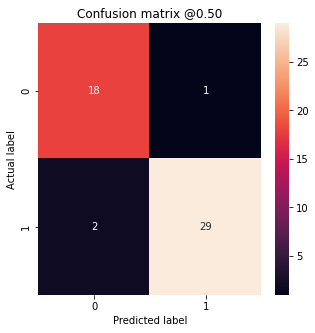

In [56]:
validation_predictions = model.predict(valid_set)

labels = valid_set.labels

cm = confusion_matrix(labels, validation_predictions > 0.5)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix @{:.2f}'.format(0.5))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Non-tumor detected (True Negatives): ', cm[0][0])
print('Non-tumor incorrectly detected (False Positives): ', cm[0][1])
print('Tumor missed (False Negatives): ', cm[1][0])
print('Tumor detected (True Positives): ', cm[1][1])
print('Total case: ', np.sum(cm[1]))

## Results

In [57]:
h = history2.history
h.keys()

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision'])

<function matplotlib.pyplot.show>

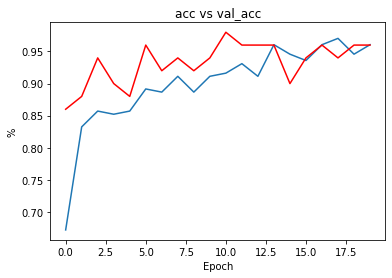

In [58]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.xlabel('Epoch')
plt.ylabel('%')
plt.title('acc vs val_acc')
plt.show

<function matplotlib.pyplot.show>

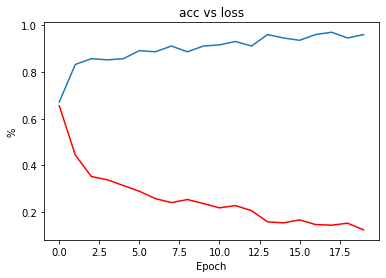

In [59]:
plt.plot(h['accuracy'])
plt.plot(h['loss'], c='red')
plt.xlabel('Epoch')
plt.ylabel('%')
plt.title('acc vs loss')
plt.show